In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [64]:
data=pd.read_csv("Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [65]:
label_encoder=preprocessing.LabelEncoder()
data['ShelveLoc']=label_encoder.fit_transform(company['ShelveLoc'])
data['Urban']=label_encoder.fit_transform(company['Urban'])
data['US']=label_encoder.fit_transform(company['US'])

In [62]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [44]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [45]:
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [46]:
data['Sales'].unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [53]:
ab = data.Sales.value_counts()

In [48]:
colnames=list(data.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=42)

In [51]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [61]:
model.score(x_test,y_test)

0.23317113402838585

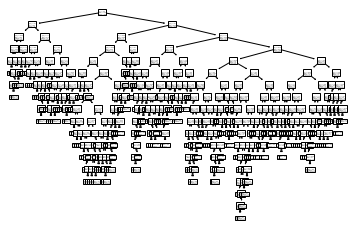

In [52]:
tree.plot_tree(model);

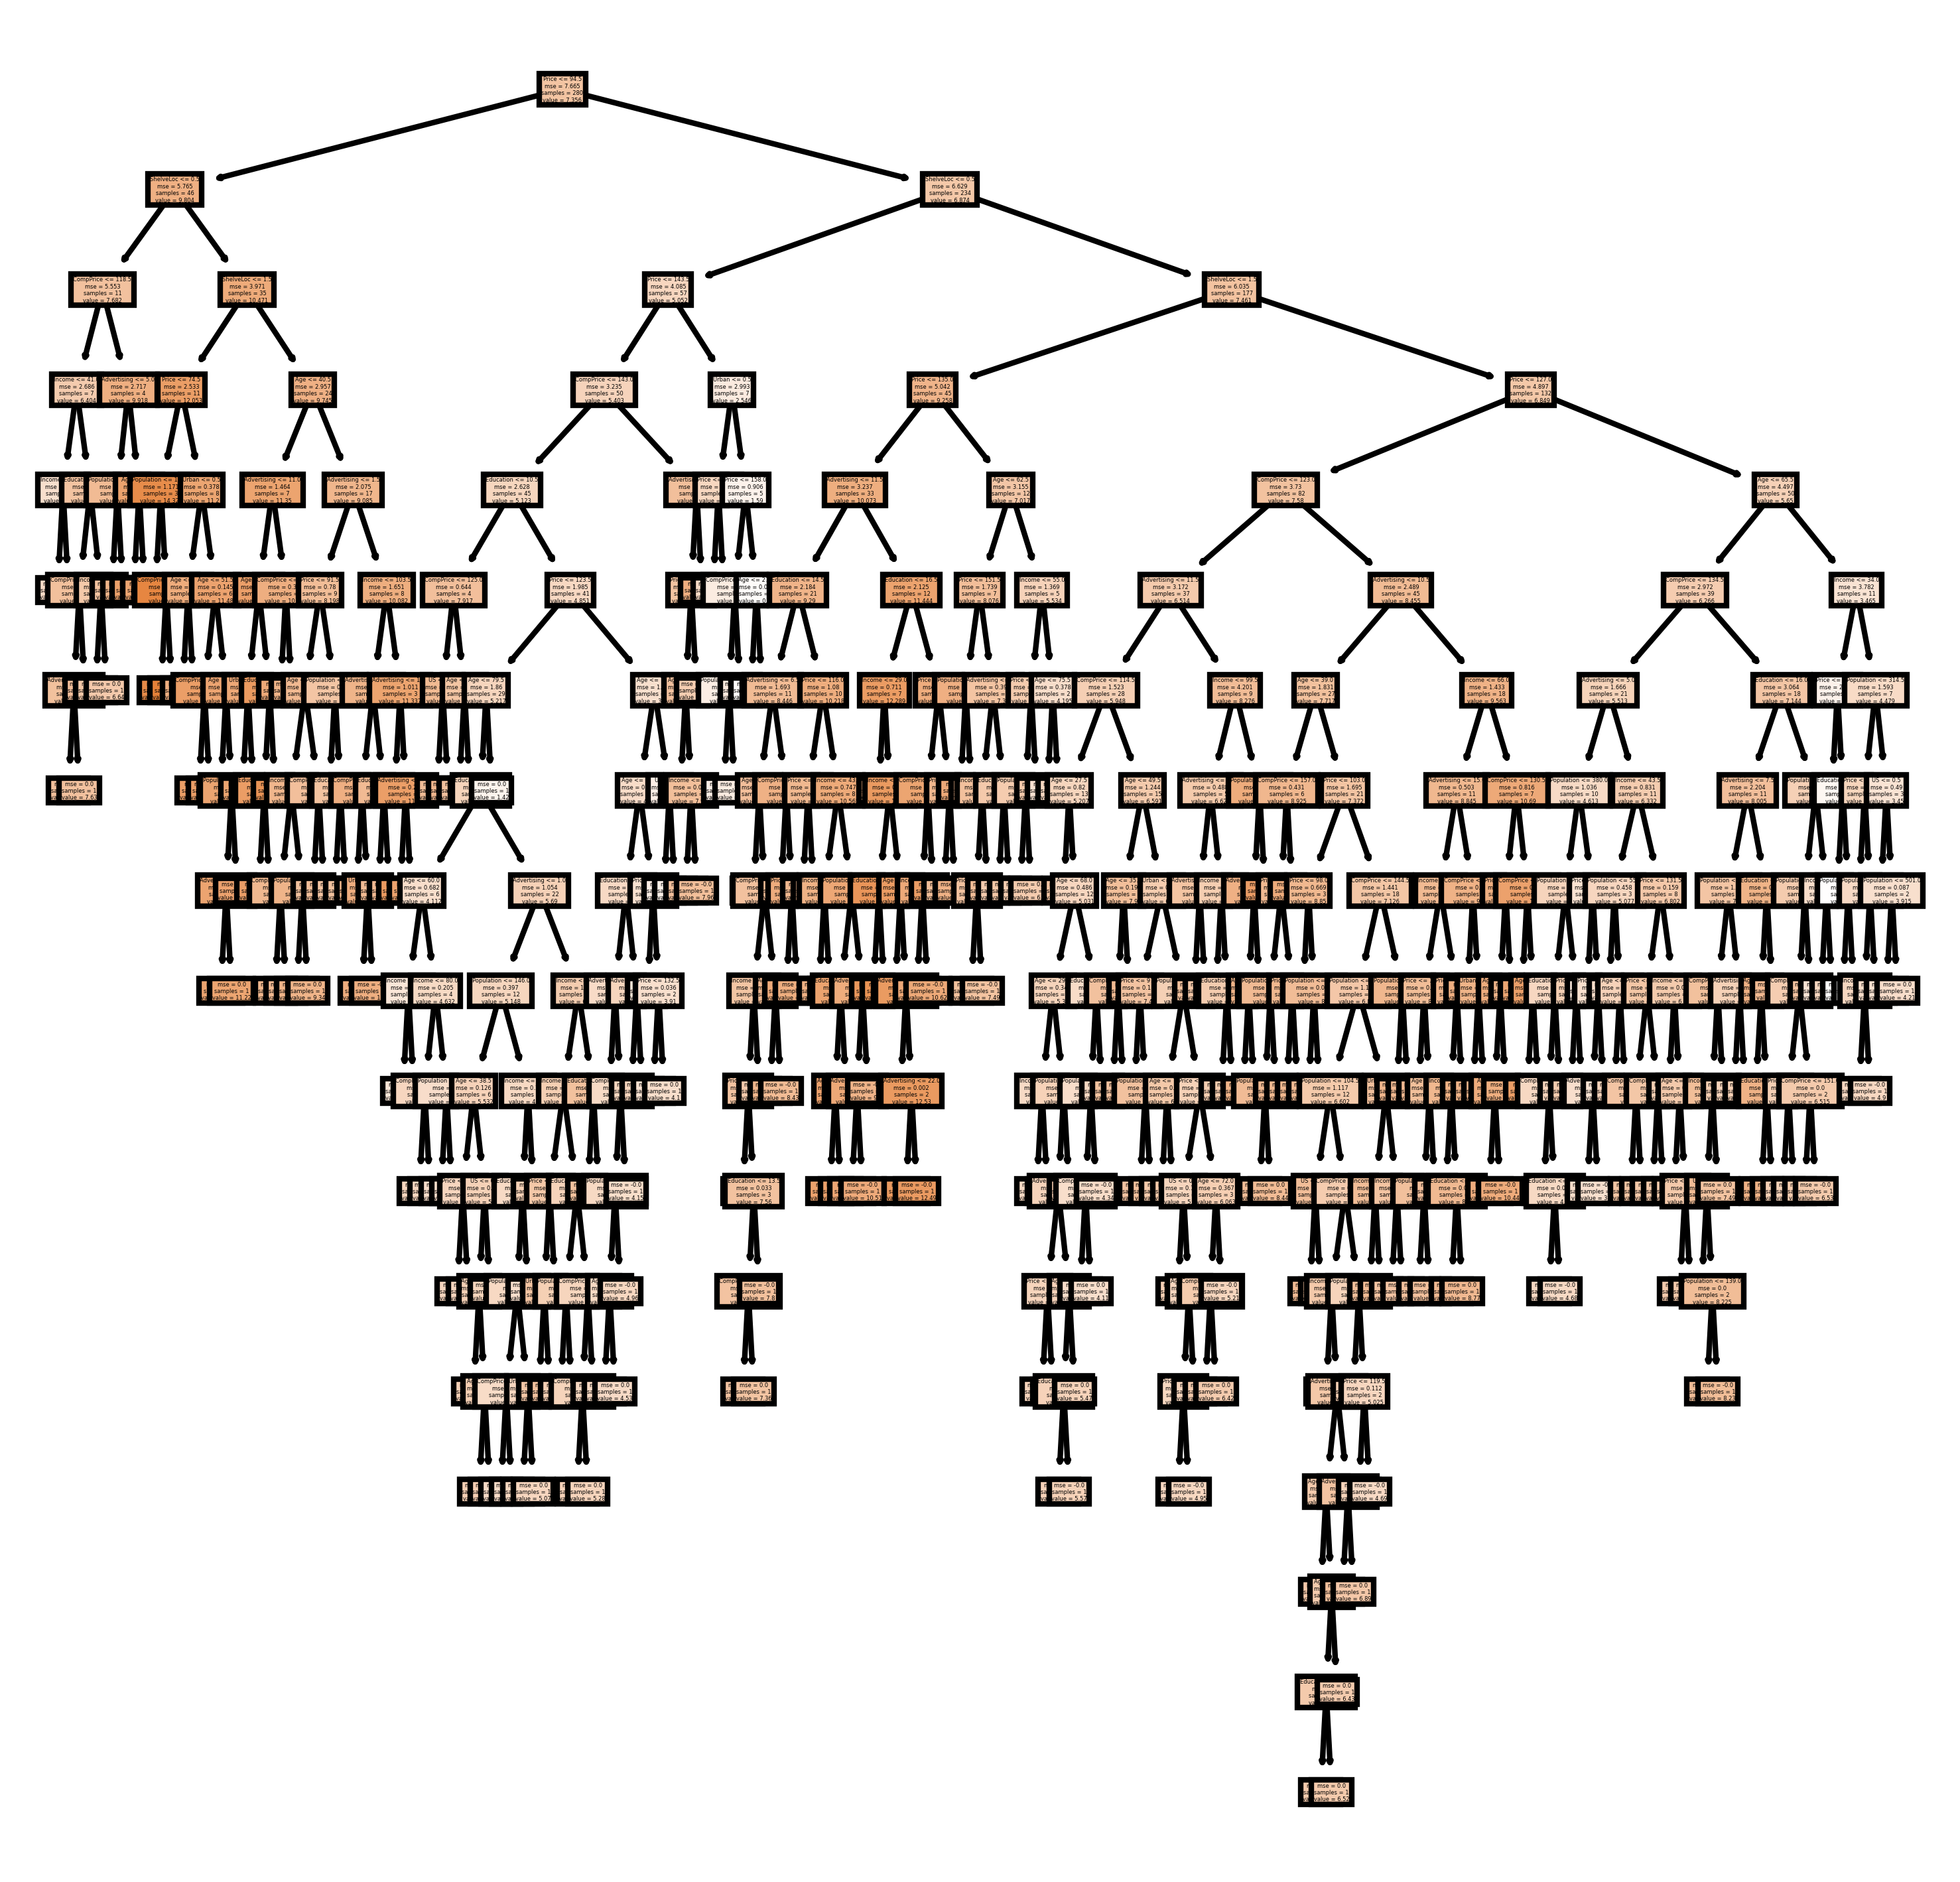

In [56]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['ab']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [57]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

11.18    4
5.30     3
12.29    3
11.07    3
2.34     3
        ..
4.88     1
6.80     1
9.24     1
10.61    1
10.00    1
Length: 86, dtype: int64

In [58]:
pd.crosstab(y_test,preds)

col_0,2.34,2.52,2.66,3.42,3.58,3.90,4.10,4.11,4.17,4.42,...,11.07,11.18,11.70,11.96,11.99,12.13,12.29,12.57,13.39,15.63
Sales,,,,,,,,,,,,,,,,,,,,,
0.91,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2.23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.86,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.02,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3.07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13.44,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13.55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13.91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
np.mean(preds==y_test)

0.008333333333333333